# Table of Contents
 <p>

In [4]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [5]:
def lin(a,b,x): return a*x+b

In [6]:
a=3.
b=8.

In [7]:
n=30
x = random(n)
y = lin(a,b,x)

In [8]:
x

array([ 0.5073,  0.5891,  0.8897,  0.4549,  0.7582,  0.4468,  0.9487,  0.1396,  0.2825,  0.8487,
        0.7713,  0.9786,  0.0623,  0.215 ,  0.1611,  0.3648,  0.9312,  0.4814,  0.4974,  0.2509,
        0.8411,  0.999 ,  0.7968,  0.5037,  0.3544,  0.3413,  0.5823,  0.9838,  0.6222,  0.3187])

In [9]:
y

array([  9.5219,   9.7674,  10.669 ,   9.3648,  10.2747,   9.3403,  10.846 ,   8.4187,   8.8476,
        10.5462,  10.3139,  10.9359,   8.187 ,   8.6449,   8.4834,   9.0943,  10.7935,   9.4441,
         9.4923,   8.7526,  10.5233,  10.9969,  10.3904,   9.511 ,   9.0632,   9.0239,   9.7468,
        10.9515,   9.8666,   8.956 ])

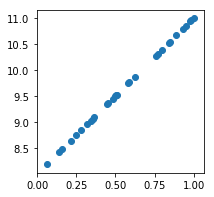

In [10]:
plt.scatter(x,y)

In [11]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()

def loss(y,a,b,x): return sse(y, lin(a,b,x))

def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [12]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.3239

In [ ]:
### Our objective is to minimize the loss 

## What is the loss 
## Loss is the diffrence in the real value and the predicted value of variable Y

#y = aX + b 

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

## We need to minimize the loss so if we take the derivative wrt to a and b 

In [13]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [21]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani